In [1]:
# Evolutonary Algorithm for minimizing 2D function
# I will run it for Ackley function as an example

# import libraries
#====================================================
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
#====================================================

#============================================================================================
# Input parameters
#============================================================================================
a1 = -10                   # x1 min value           
a2 = 10                    # x1 max value
b1 = -10                   # x2 min value 
b2 = 10                    # x2 max value
N_pop = 10                 # population size, should be even number
sel_num = int(N_pop*0.6)   # we can choose only 0.2,0.4,0.6,0.8 values for multyplyig
mu = 0                     # mean value of for gaussian distribution
sigma = 0.15               # standard deviation for mutating offsprings
N_gen = 50                 # number of generations to be evaluated
#============================================================================================


def EvolAlg(a1, a2, b1, b2, N_pop, func, sel_num, N_gen,mu,sigma):
    
    # Example functoin [Ackley 2D]
    def Ackley(x1, x2):
        return(20 + np.e -20*np.exp(-0.2*np.sqrt((x1**2+x2**2)/2))-np.exp((np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))/2))    
    
    # Generating random initial population
    def Initial_Pop (a1,a2,b1,b2,N_pop):
        init_pop = []                  # epty array to store [x1, x2] pairs
        for i in range(N_pop):
            init_pop.append([random.uniform(a1, a2),random.uniform(b1, b2)])
        return init_pop
    
    # Function which is calculating the fitness of each individual
    def Fitness(pop_list, func):
        if func == 'Ackley':
            fitn_values = []
            for item in pop_list:
                fitn_values.append(Ackley(item[0], item[1])) 
            return fitn_values
        else:
            print("Only done for Ackley function so far!")
   
    # Selecting best individuals 
    def Selector(fitns_list, sel_num): 
        sort_ind = sorted(fitns_list, reverse=False)
        return sort_ind[:sel_num]
    
    # Function which is returning best pairs 
    def FindPair(population,sel_num):
        fitn_list = Fitness(population,func)
        selected_ind = Selector(fitn_list,sel_num)
        b_pairs =[]
        for item in selected_ind:
            if item in fitn_list:
                b_pairs.append(population[fitn_list.index(item)])
        return b_pairs
    
    # Function which is creating offsprings
    def Producer(best_pairs):
        offs = []
        best_p_copy = best_pairs.copy()
        for i in range(int(sel_num/2)):
            x1_off = (best_p_copy[0][0] + best_p_copy[1][0])/2
            x2_off = (best_p_copy[0][1] + best_p_copy[1][1])/2
            offs.append([x1_off,x2_off])
            best_p_copy.pop(0)
            best_p_copy.pop(0)        
        return offs
    
    # mutating coordinates using gausian noise
    def Mutator(offspring):
        mut_off = []          
        noise = np.random.normal(mu, sigma)
        for item in offspring:
            mut_off.append([elem + noise for elem in item])
        return mut_off
    
    # Updating population
    def Updated_pop():
        a =  Initial_Pop(a1,a2,b1,b2,N_pop)
        b =  Mutator(offspring)
        return a + b

    def Survived(upd_pop,N_pop):
        return FindPair(upd_pop,N_pop)
    
    init_pop = Initial_Pop(a1,a2,b1,b2,N_pop)
    best_ind = []                              # empty list for best values
    for i in range(N_gen):
        best_pairs = FindPair(init_pop,sel_num) 
        offspring = Producer(best_pairs)
        mutated_offs = Mutator(offspring)
        upd_pop = Updated_pop()
        best_ind.append(upd_pop[Fitness(upd_pop,func).index(min(Fitness(upd_pop,func)))])
        init_pop = Survived(upd_pop,N_pop)
    
    return best_ind


#print(EvolAlg(a1, a2, b1, b2, N_pop, 'Ackley', sel_num,N_gen))  
Res = EvolAlg(a1, a2, b1, b2, N_pop, 'Ackley', sel_num, N_gen,mu,sigma)
#print(Res)



In [2]:
# Create plotting function for plotting results
def Plotter(Res,N_pop,sel_num, N_gen, mu,sigma):
    best_x1 = [item[0] for item in Res]   # getting coordinate values (x1) for plotting from results
    best_x2 = [item[1] for item in Res]   # getting coordinate values (x2) for plotting from results
    plt.plot(best_x1,'b.-')
    plt.plot(best_x2,'g--')
    plt.legend(['x1','x2'])
    plt.title('N_pop = {}, Sel_num = {}, Sigma ={}, N_gen={}, mu={}'.format(N_pop,sel_num,sigma,N_gen,mu),fontsize=12, loc="left" )
    plt.show()

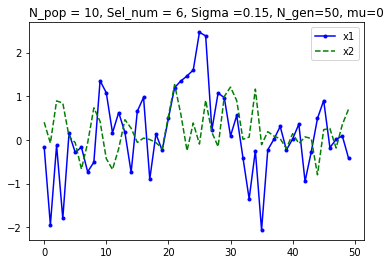

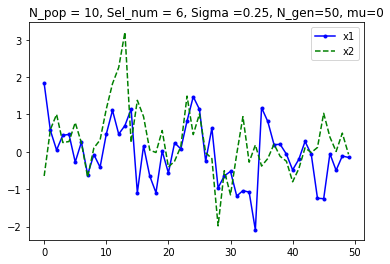

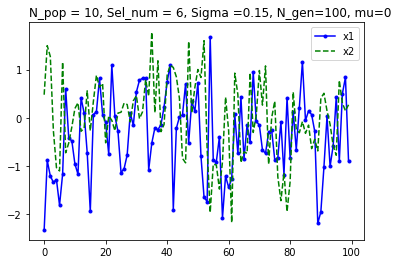

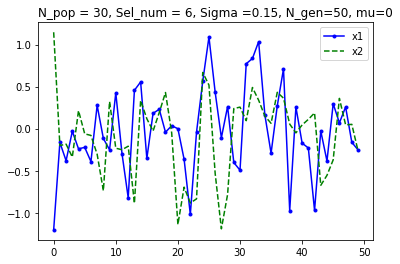

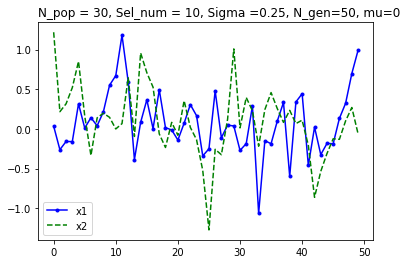

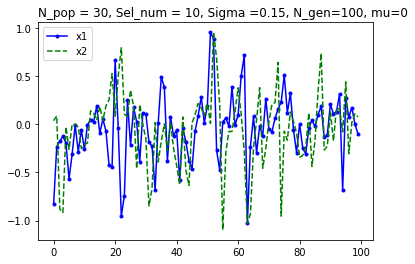

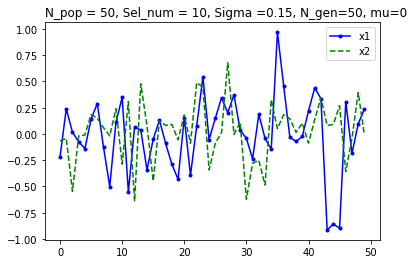

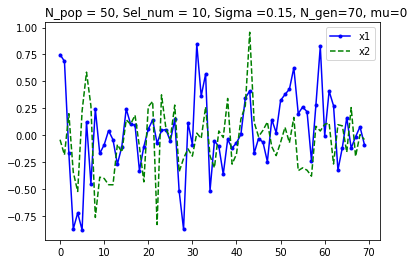

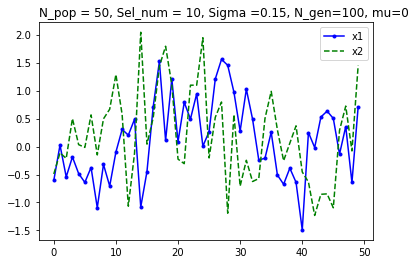

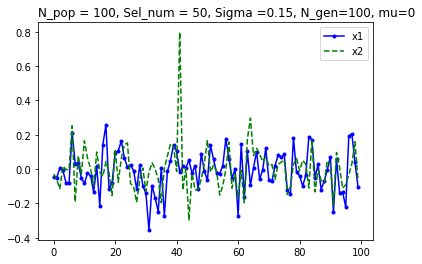

In [3]:
# Now lets run the algorythm for different cases

#==========================================================================
a1 = -10                   # x1 min value           
a2 = 10                    # x1 max value
b1 = -10                   # x2 min value 
b2 = 10                    # x2 max value
#==========================================================================

# Case1:  | N_pop = 10 | sel_num = 6  | N_gen = 50  | mu = 0 | sigma = 0.15 

case1 = EvolAlg(a1, a2, b1, b2, 10, 'Ackley', 6, 50, 0, 0.15)

Plotter(case1, 10, 6, 50, 0, 0.15)
#-------------------------------------------------------------------------------
# Case2:  | N_pop = 10 | sel_num = 6   | mu = 0 | sigma = 0.25 | N_gen = 50  |
case2 = EvolAlg(a1, a2, b1, b2, 10, 'Ackley', 6, 50, 0, 0.25)
Plotter(case2, 10, 6, 50, 0, 0.25)
#-------------------------------------------------------------------------------
# Case3:  | N_pop = 10 | sel_num = 6   | mu = 0 | sigma = 0.15 | N_gen = 100 |
case3 = EvolAlg(a1, a2, b1, b2, 10, 'Ackley', 6, 100, 0, 0.15)
Plotter(case3, 10, 6, 100, 0, 0.15)
#-------------------------------------------------------------------------------
# Case4:  | N_pop = 30 | sel_num = 10  | mu = 0 | sigma = 0.15 | N_gen = 50  |
case4 = EvolAlg(a1, a2, b1, b2, 30, 'Ackley', 6, 50, 0, 0.15)
Plotter(case4, 30, 6, 50, 0, 0.15)
#-------------------------------------------------------------------------------
# Case5:  | N_pop = 30 | sel_num = 10  | mu = 0 | sigma = 0.25 | N_gen = 50  |
case5 = EvolAlg(a1, a2, b1, b2, 30, 'Ackley', 10, 50, 0, 0.25)
Plotter(case5, 30, 10, 50, 0, 0.25)
#-------------------------------------------------------------------------------
# Case6:  | N_pop = 30 | sel_num = 10  | mu = 0 | sigma = 0.15 | N_gen = 100 |
case6 = EvolAlg(a1, a2, b1, b2, 30, 'Ackley', 10, 100, 0, 0.15)
Plotter(case6, 30, 10, 100, 0, 0.15)
#-------------------------------------------------------------------------------
# Case7:  | N_pop = 50 | sel_num = 10  | mu = 0 | sigma = 0.15 | N_gen = 50 |
case7 = EvolAlg(a1, a2, b1, b2, 50, 'Ackley', 10, 50, 0, 0.15)
Plotter(case7, 50, 10, 50, 0, 0.15)
#-------------------------------------------------------------------------------
# Case8:  | N_pop = 50 | sel_num = 10  | mu = 0 | sigma = 0.15 | N_gen = 70 |
case8 = EvolAlg(a1, a2, b1, b2, 50, 'Ackley', 10, 70, 0, 0.15)
Plotter(case8, 50, 10, 70, 0, 0.15)
#-------------------------------------------------------------------------------
# Case9:  | N_pop = 50 | sel_num = 10  | mu = 0 | sigma = 0.15 | N_gen = 100 |
case9 = EvolAlg(a1, a2, b1, b2, 10, 'Ackley', 6, 50, 0, 0.15)
Plotter(case9, 50, 10, 100, 0, 0.15)
#-------------------------------------------------------------------------------
# Case10:  | N_pop = 100 | sel_num = 50  | mu = 0 | sigma = 0.15 | N_gen = 100 |
case10 = EvolAlg(a1, a2, b1, b2, 100, 'Ackley', 50, 100, 0, 0.15)
Plotter(case10, 100, 50, 100, 0, 0.15)
#-------------------------------------------------------------------------------



